In [2]:
import re
import numpy as np

def read_pgm(filename, byteorder='>'):
    """Return image data from a raw PGM file as np array.

    Format specification: http://netpbm.sourceforge.net/doc/pgm.html

    """
    with open(filename, 'rb') as f:
        buffer = f.read()
    try:
        header, width, height, maxval = re.search(
            b"(^P5\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n]\s)*)", buffer).groups()
    except AttributeError:
        raise ValueError("Not a raw PGM file: '%s'" % filename)
    return np.frombuffer(buffer,
                            dtype='u1' if int(maxval) < 256 else byteorder+'u2',
                            count=int(width)*int(height),
                            offset=len(header)
                            ).reshape((int(height), int(width)))

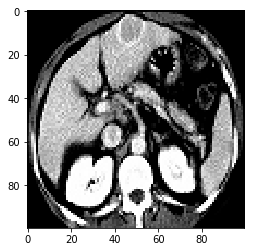

In [3]:
from matplotlib import pyplot
image = read_pgm("../imgs_TC/tomo.pgm", byteorder='<')
pyplot.imshow(image, pyplot.cm.gray)
pyplot.show()

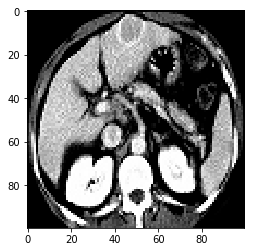

In [7]:
from matplotlib import pyplot
image = read_pgm("../results/prueba_tomo.pgm", byteorder='<')
pyplot.imshow(image, pyplot.cm.gray)
pyplot.show()

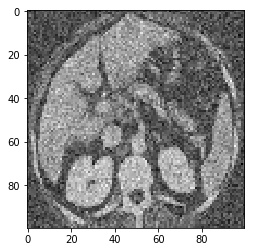

msq is: 2462.16351666


In [5]:
distorted_image = image + np.random.normal(0, 50, image.shape)
pyplot.imshow(distorted_image, pyplot.cm.gray)
pyplot.show()

from sklearn.metrics import mean_squared_error
msq = mean_squared_error(image.reshape(-1), distorted_image.reshape(-1))

print("msq is: {}".format(msq))

#### Dicom

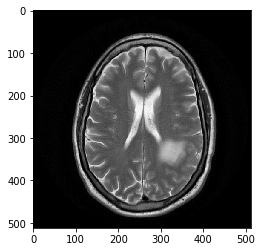

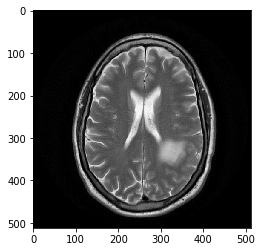

In [7]:
import pydicom as dicom
from matplotlib import pyplot
ds = dicom.dcmread("../imgs_TC/cornell_imgs/dicom/000000.dcm")
pyplot.imshow(ds.pixel_array, pyplot.cm.gray)
pyplot.show()


pgm = read_pgm("../imgs_TC/cornell_imgs/000000.pgm", byteorder='>')
pyplot.imshow(pgm, pyplot.cm.gray)
pyplot.show()